In [1]:
from tsutils import get_jena, WindowGenerator, compile_and_fit, split_data, nse_loss, split_data_2
import tensorflow as tf

# Read Data

In [2]:
df = get_jena()

In [3]:
df.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),Wx,Wy,max Wx,max Wy,Day sin,Day cos,Year sin,Year cos
5,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,-0.204862,-0.046168,-0.614587,-0.138503,0.258819,0.965926,0.010049,0.999950
11,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,-0.245971,-0.044701,-0.619848,-0.112645,0.500000,0.866025,0.010766,0.999942
17,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,-0.175527,0.039879,-0.614344,0.139576,0.707107,0.707107,0.011483,0.999934
23,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,-0.050000,-0.086603,-0.190000,-0.329090,0.866025,0.500000,0.012199,0.999926
29,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,-0.368202,0.156292,-0.810044,0.343843,0.965926,0.258819,0.012916,0.999917


In [4]:
df.shape

(70091, 19)

In [5]:
# column_indices = {name: i for i, name in enumerate(df.columns)}

# Split Data

We will use a 70%, 20%, 10% train/validation/test split.

In [5]:
train_df, val_df, test_df = split_data(df, 0.7, 0.2, True)

In [3]:
train_df, val_df, test_df = split_data_2(df, 0.7, 0.2, "T (degC)")

In [4]:
train_df.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),Wx,Wy,max Wx,max Wy,Day sin,Day cos,Year sin,Year cos
5,0.945308,-8.05,-2.041888,-1.918973,1.117102,-1.302851,-1.477323,-0.790424,-1.480036,-1.482697,2.218524,0.193409,0.221161,0.111140,0.217928,0.366111,1.366069,-0.061052,1.428434
11,0.959770,-8.88,-2.138166,-2.060964,1.044617,-1.330143,-1.534354,-0.786272,-1.536190,-1.539035,2.325708,0.172987,0.222101,0.109458,0.227798,0.707200,1.224794,-0.060029,1.428424
17,0.986284,-8.81,-2.132435,-2.045187,1.062738,-1.328843,-1.527225,-0.788348,-1.528703,-1.531992,2.323998,0.207983,0.276266,0.111218,0.324078,1.000100,1.000059,-0.059006,1.428412
23,1.004362,-9.05,-2.161090,-2.096820,1.008375,-1.336641,-1.546235,-0.782121,-1.547420,-1.553119,2.358913,0.270343,0.195267,0.246907,0.145176,1.224850,0.707179,-0.057983,1.428400
29,1.061006,-9.63,-2.232152,-2.187178,0.984214,-1.353535,-1.579503,-0.782121,-1.581113,-1.585982,2.446320,0.112264,0.350818,0.048640,0.402053,1.366133,0.366112,-0.056960,1.428388


# Test `WindowGenerator`

In [5]:
w = WindowGenerator(14, 1, 7, train_df, val_df, test_df, ['T (degC)'])

In [8]:
w

Total window size: 21
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
Label indices: [20]
Label column name(s): ['T (degC)']

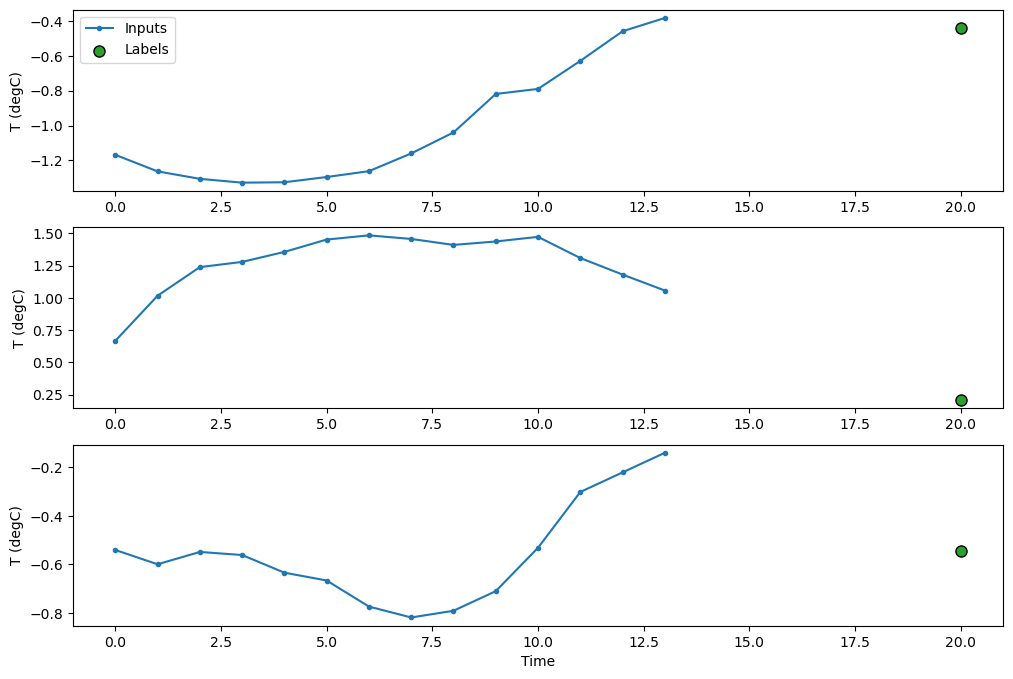

In [10]:
w.plot('T (degC)')

# Make Forecast Model

In [6]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=False),
    tf.keras.layers.Dropout(0.5),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

2022-12-06 14:47:20.914429: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-12-06 14:47:20.931949: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-12-06 14:47:20.932627: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-12-06 14:47:20.933710: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate

In [7]:
history = compile_and_fit(lstm_model, w, 20, 5)

Epoch 1/20


2022-12-06 14:47:32.558959: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100


1533/1533 [==============================] - 17s 9ms/step - loss: -0.6920 - mean_absolute_error: 3.2701 - val_loss: -0.8873 - val_mean_absolute_error: 1.8663
Epoch 2/20
1533/1533 [==============================] - 17s 11ms/step - loss: -0.8551 - mean_absolute_error: 2.3936 - val_loss: -0.9075 - val_mean_absolute_error: 1.7180
Epoch 3/20
1533/1533 [==============================] - 16s 10ms/step - loss: -0.8686 - mean_absolute_error: 2.2831 - val_loss: -0.9115 - val_mean_absolute_error: 1.7005
Epoch 4/20
1533/1533 [==============================] - 17s 11ms/step - loss: -0.8776 - mean_absolute_error: 2.2068 - val_loss: -0.9158 - val_mean_absolute_error: 1.6512
Epoch 5/20
1533/1533 [==============================] - 16s 10ms/step - loss: -0.8825 - mean_absolute_error: 2.1536 - val_loss: -0.9150 - val_mean_absolute_error: 1.6739
Epoch 6/20
1533/1533 [==============================] - 20s 13ms/step - loss: -0.8886 - mean_absolute_error: 2.1005 - val_loss: -0.9182 - val_mean_absolute_error: